In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
data = pd.read_csv('C:\\Users\\user\\Downloads\\Iris.csv')

In [4]:
data.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
data.drop(columns='Id', axis=1, inplace= True)

In [6]:
data.tail(2)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [7]:
data[['Species']].value_counts()

Species        
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

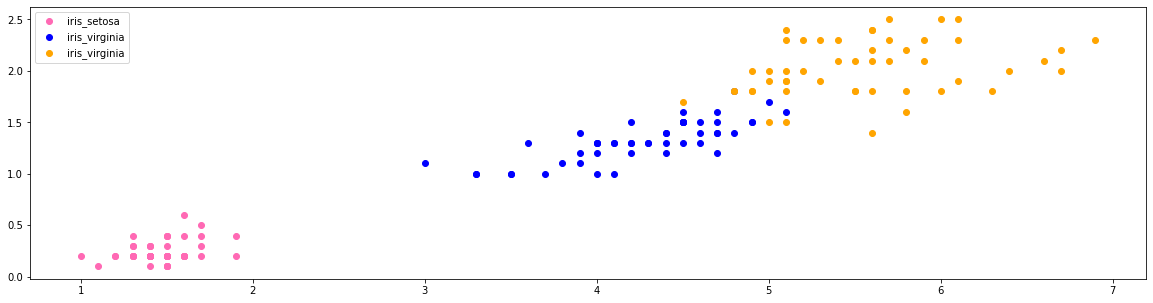

In [8]:
iris_setosa = data[data[list(data.columns)[-1]] == 'Iris-setosa']
iris_versicolor = data[data[list(data.columns)[-1]] == 'Iris-versicolor']
iris_virginia = data[data[list(data.columns)[-1]] == 'Iris-virginica']
fig , axes = plt.subplots(1,1, figsize=(20,5))
plt.scatter(iris_setosa['PetalLengthCm'], iris_setosa['PetalWidthCm'], c = 'hotpink', label = 'iris_setosa')
plt.scatter(iris_versicolor['PetalLengthCm'], iris_versicolor['PetalWidthCm'], c = 'blue', label = 'iris_virginia')
plt.scatter(iris_virginia['PetalLengthCm'], iris_virginia['PetalWidthCm'], c = 'orange', label = 'iris_virginia')
plt.legend()
plt.show()

In [11]:
from sklearn.preprocessing import LabelEncoder

X = data[list(data.columns)[:-1]]
Y = data[list(data.columns)[-1]]

encoder = LabelEncoder()
encodedY = encoder.fit_transform(Y)

from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = StandardScaler()
scaledX = scaler.fit_transform(X)

In [12]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(scaledX, encodedY, test_size= 0.35, random_state= 3)

In [14]:
from sklearn import linear_model
li_model = linear_model.LogisticRegression()
li_model.fit(xtrain, ytrain)
ypred = li_model.predict(xtest)
ypred == ytest

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True,  True,  True,  True,  True])

In [17]:
from sklearn.metrics import confusion_matrix, f1_score
print('Confusion Matrix: \n', confusion_matrix(ypred, ytest))
print('F1_score:', f1_score(ypred, ytest, average= None))

Confusion Matrix: 
 [[20  0  0]
 [ 0 14  0]
 [ 0  3 16]]
F1_score: [1.         0.90322581 0.91428571]


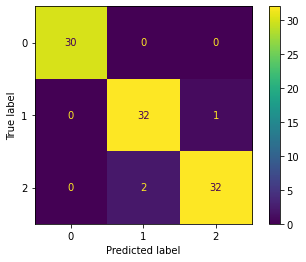

In [19]:
from sklearn import metrics
metrics.plot_confusion_matrix(li_model, xtrain, ytrain)

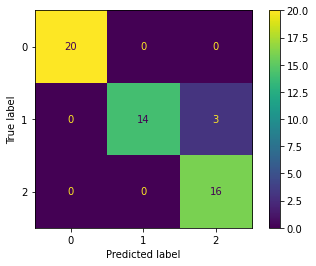

In [20]:
from sklearn import metrics
metrics.plot_confusion_matrix(li_model, xtest, ytest)

In [21]:
from sklearn.model_selection import cross_val_score
cv = cross_val_score(
    li_model, scaledX, encodedY, cv = 4, scoring= 'accuracy'
)
cv.mean()

0.9598150782361309

In [22]:
linear_model.LogisticRegression().get_params().keys()

dict_keys(['C', 'class_weight', 'dual', 'fit_intercept', 'intercept_scaling', 'l1_ratio', 'max_iter', 'multi_class', 'n_jobs', 'penalty', 'random_state', 'solver', 'tol', 'verbose', 'warm_start'])

In [26]:
import warnings
warnings.filterwarnings(action='ignore')

Fitting 5 folds for each of 80 candidates, totalling 400 fits


In [27]:
from sklearn.model_selection import RandomizedSearchCV

##
grid = linear_model.LogisticRegression()


##
gridModel = RandomizedSearchCV(
    grid,
    param_distributions ={
        'penalty':['l1','l2','elasticnet','None'],
        'C': np.logspace(1,10, 1000),
        'solver':['newton-cg', 'sag','lbfgs','saga','liblinear'],
        'max_iter':list(range(100,3000, 100))
    },
    cv =3, scoring='accuracy', n_iter=100, n_jobs = -1, verbose=3
)
gridModel.fit(xtrain, ytrain)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=LogisticRegression(), n_iter=100, n_jobs=-1,
                   param_distributions={'C': array([1.00000000e+01, 1.02096066e+01, 1.04236067e+01, 1.06420924e+01,
       1.08651577e+01, 1.10928986e+01, 1.13254132e+01, 1.15628013e+01,
       1.18051653e+01, 1.20526094e+01, 1.23052400e+01, 1.25631660e+01,
       1.28264983e+01, 1.30953502e+01, 1.33698374e+01, 1.36500781e+01,
       1....
       8.64842328e+09, 8.82969996e+09, 9.01477631e+09, 9.20373200e+09,
       9.39664831e+09, 9.59360829e+09, 9.79469667e+09, 1.00000000e+10]),
                                        'max_iter': [100, 200, 300, 400, 500,
                                                     600, 700, 800, 900, 1000,
                                                     1100, 1200, 1300, 1400,
                                                     1500, 1600, 1700, 1800,
                                                     1900, 2000, 2100, 2200,
                                              

In [30]:
gridModel.best_params_

{'solver': 'saga', 'penalty': 'l1', 'max_iter': 1000, 'C': 21102.034285685964}

In [32]:
model = gridModel.best_estimator_
model

LogisticRegression(C=21102.034285685964, max_iter=1000, penalty='l1',
                   solver='saga')

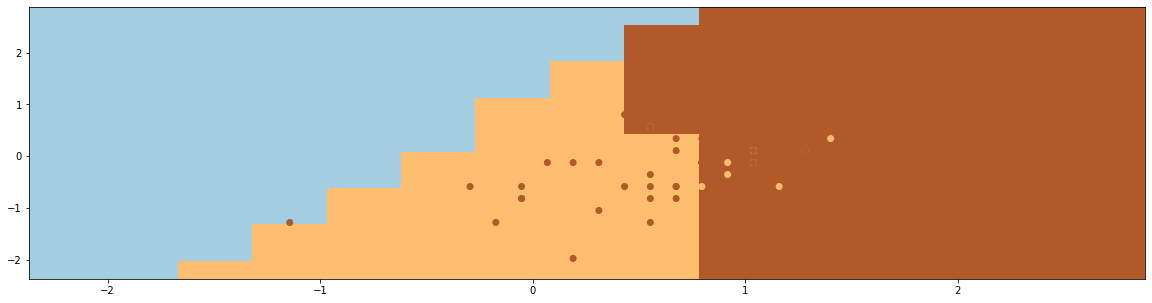

In [37]:
logistic_model = gridModel.best_estimator_
logistic_model.fit(scaledX[:, :2], encodedY)

xmin , xmax = scaledX[: , 0].min() - 0.5, scaledX[:, 0].max() + 0.5
ymin , ymax = scaledX[: , 0].min() - 0.5 , scaledX[: , 0].max() + 0.5

xx , yy = np.meshgrid(
    np.arange(xmin, xmax, 0.35), np.arange(ymin, ymax, 0.35)
)

z = logistic_model.predict(np.c_[xx.ravel(), yy.ravel()])
z
z = z.reshape(xx.shape)
plt.figure(1, figsize=(20,5))
plt.set_cmap(plt.cm.Paired)
plt.pcolormesh(xx, yy, z)

plt.scatter(scaledX[:,0], scaledX[:,1], c = encodedY)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.show()


In [ ]:
gridmodel.best_params_

In [39]:
from sklearn import pipeline

logistic = linear_model.LogisticRegression(
    solver = 'saga', 
     penalty = 'l1', 
    max_iter = 1000, 
    C = 21102.034285685964
)

## Initialize
pipe = pipeline.Pipeline(
    [
        ('scaler', MinMaxScaler()),
        ('forest',logistic)
    ]
)

## Train
pipe.fit(xtrain, ytrain)

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('forest',
                 LogisticRegression(C=21102.034285685964, max_iter=1000,
                                    penalty='l1', solver='saga'))])

In [40]:
indices = np.random.randint(0,149, 3)

features= data.iloc[indices, 0:-1].values
features

array([[5.1, 2.5, 3. , 1.1],
       [6. , 2.9, 4.5, 1.5],
       [4.4, 3. , 1.3, 0.2]])

In [41]:
ypred = pipe.predict(features)

In [42]:
encoder.inverse_transform(ypred)

array(['Iris-virginica', 'Iris-virginica', 'Iris-versicolor'],
      dtype=object)

In [43]:
data.iloc[indices].values

array([[5.1, 2.5, 3.0, 1.1, 'Iris-versicolor'],
       [6.0, 2.9, 4.5, 1.5, 'Iris-versicolor'],
       [4.4, 3.0, 1.3, 0.2, 'Iris-setosa']], dtype=object)